# checking LO files for ariane troubleshooting

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = xr.open_dataset('/data1/parker/LO_roms/cas6_v1_live/f2023.08.01/ocean_his_0003.nc')

In [3]:
x = [288,289,290]
y = [953,954,955]

X, Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()

u = [np.round(d.u[0,0,Y[i],X[i]].values,3) for i in range(len(X))]
v = [np.round(d.v[0,0,Y[i],X[i]].values,3) for i in range(len(X))]
w = [np.round(d.w[0,0,Y[i],X[i]].values,3) for i in range(len(X))]

Text(0.5, 1.0, 'w')

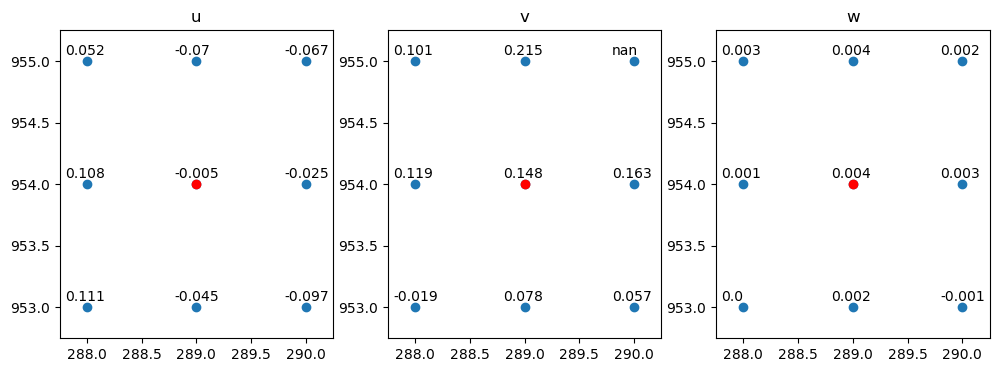

In [4]:
fig, ax = plt.subplots(1,3,figsize =[12,4])

for i in range(len(ax)):
    ax[i].scatter(X,Y)
    ax[i].scatter(289,954,color='r',zorder=2)
    ax[i].set_ylim([952.75,955.25])
    ax[i].set_xlim([287.75,290.25]) 

for i, txt in enumerate(u):
    ax[0].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[0].set_title('u')

for i, txt in enumerate(v):
    ax[1].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[1].set_title('v')

for i, txt in enumerate(w):
    ax[2].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[2].set_title('w')

In [5]:
for i in range(len(d.s_rho)):
    u = np.round(d.u[0,i,955,290].values,3) 
    v = np.round(d.v[0,i,955,290].values,3) 
    w = np.round(d.w[0,i,955,290].values,3) 

    print("u= "+str(u)+", v= "+str(v)+", w= "+str(w))

u= -0.067, v= nan, w= 0.002
u= -0.073, v= nan, w= 0.002
u= -0.078, v= nan, w= 0.003
u= -0.112, v= nan, w= 0.003
u= -0.13, v= nan, w= 0.004
u= -0.112, v= nan, w= 0.004
u= -0.077, v= nan, w= 0.004
u= -0.047, v= nan, w= 0.004
u= -0.039, v= nan, w= 0.004
u= -0.055, v= nan, w= 0.004
u= -0.069, v= nan, w= 0.004
u= -0.115, v= nan, w= 0.004
u= -0.143, v= nan, w= 0.004
u= -0.152, v= nan, w= 0.004
u= -0.158, v= nan, w= 0.004
u= -0.139, v= nan, w= 0.004
u= -0.109, v= nan, w= 0.004
u= -0.081, v= nan, w= 0.003
u= -0.061, v= nan, w= 0.003
u= -0.038, v= nan, w= 0.003
u= -0.025, v= nan, w= 0.002
u= -0.007, v= nan, w= 0.002
u= 0.001, v= nan, w= 0.002
u= 0.017, v= nan, w= 0.001
u= 0.024, v= nan, w= 0.001
u= 0.037, v= nan, w= 0.001
u= 0.043, v= nan, w= 0.001
u= 0.054, v= nan, w= 0.0
u= 0.061, v= nan, w= 0.0
u= 0.074, v= nan, w= 0.0


# where is this nan in the model?

/tmp/ipykernel_120845/1979407392.py:8: UserWarning: linewidths is ignored by contourf
  ax.contourf(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


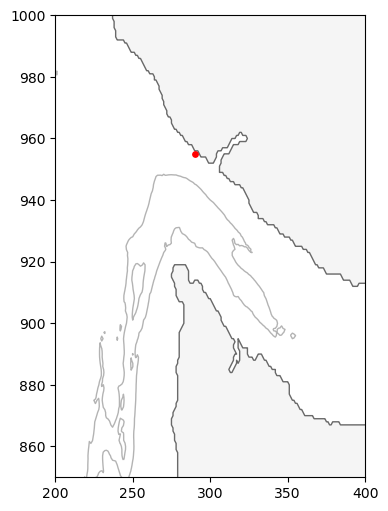

In [6]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')


fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

ax.set_ylim([850,1000])
ax.set_xlim([200,400])

ax.scatter(290,955,color='r',s=15, zorder=2)

# ax.scatter()

#### have it working now! 
the problem was the grid, fine that v is nan there bc it is on the coast - it was Ariane that was having rouble with the ROMS grid not the model that was the problem. Fixed by setting where nan replace with 0 in ariane "sub_input_data_seq_main()"

## check if test run looks good:

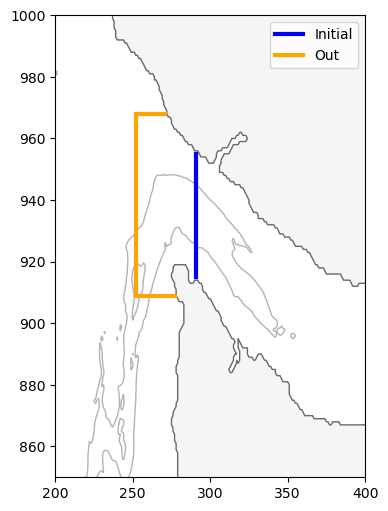

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

ax.plot([291,291],[915,955],linewidth=3,c='b',label='Initial')
ax.plot([252,277],[909,909],linewidth=3,c='orange',label='Out')
ax.plot([252,271],[968,968],linewidth=3,c='orange')
ax.plot([252,252],[909,968],linewidth=3,c='orange')
ax.legend()

ax.set_ylim([850,1000])
ax.set_xlim([200,400]);

In [11]:
run = xr.open_dataset('/data1/bbeutel/LO_user/ariane/test/back_20170902/ariane_positions_quantitative.nc')

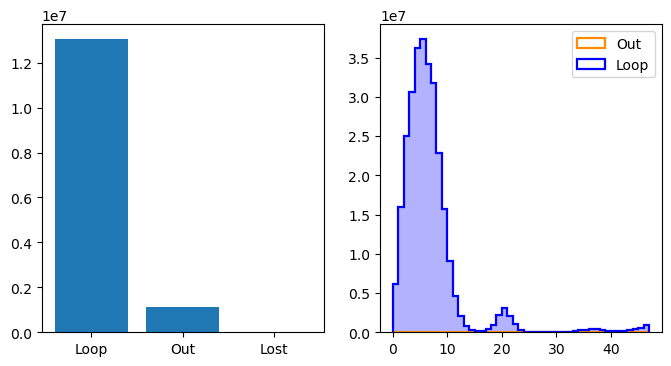

In [12]:
to_hours = (1.15741*10**-14)*24
colours = ['b', 'darkorange']

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].bar(['Loop','Out','Lost'],[np.sum(run.final_transp[run.final_section==0])/24,np.sum(run.final_transp[run.final_section==2])/24,np.sum(run.final_section[(run.final_section!=0)&(run.final_section!=2)])/24])

bins = np.arange(0,48,1)
n, _, _ = ax[1].hist([(run.final_age[run.final_section==0]*to_hours).astype(int), (run.final_age[run.final_section==2]*to_hours).astype(int)], 
                     bins=bins, weights=[run.final_transp[run.final_section==0], run.final_transp[run.final_section==2]], 
                     color = colours, label =['Loop','Out','Lost'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[1].hist([(run.final_age[run.final_section==0]*to_hours).astype(int), (run.final_age[run.final_section==2]*to_hours).astype(int)], 
           bins=bins, weights=[run.final_transp[run.final_section==0], run.final_transp[run.final_section==2]], 
           color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax[1].legend()

#### looks like it worked!
## going to larger boundaries get a coast crash at x= 324, y= 960 and sometimes at x= 317, y= 825; x=330, y=732; x=332, y=789
Susan hypothesizes that this is a mismatch between the grid mask and the velocity file mask at this location (ie. u and/or v >0 at the coast) <br> 
Other thing of note is that this only happenned in the first and last day of the run.. <br>

Fixing this way worked for cas6, now need to do for cas7

In [13]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas7/grid.nc')
data = xr.open_dataset('/agdat1/parker/LO_roms/cas7_t0_x4b/f2018.03.09/ocean_his_0004.nc')

(50.0, 400.0)

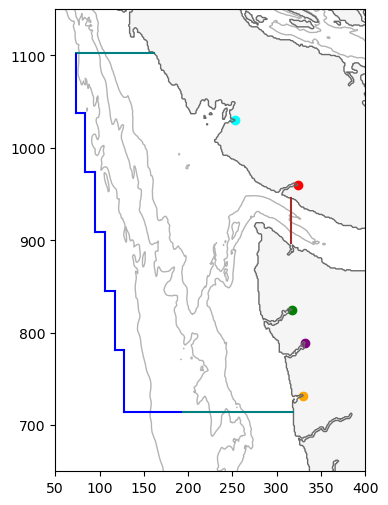

In [14]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spots
ax.scatter([324],[960],c='r')
ax.scatter([317],[825],c='g')
ax.scatter([330],[732],c='orange')
ax.scatter([332],[789],c='purple')
ax.scatter([253],[1030],c='cyan')

# and the new boundaries
plt.plot([316,316], [897,946], c='brown')
plt.plot([ 73,162],[1103,1103], c='teal')
plt.plot([128,193],[ 714, 714], c='b')
plt.plot([117,128],[ 781, 781], c='b')
plt.plot([106,117],[ 845, 845], c='b')
plt.plot([ 95,106],[ 909, 909], c='b')
plt.plot([ 84, 95],[ 974, 974], c='b')
plt.plot([ 73, 84],[1038,1038], c='b')
plt.plot([ 73, 73],[1038,1102], c='b')
plt.plot([ 84, 84],[ 974,1038], c='b')
plt.plot([ 95, 95],[ 909, 974], c='b')
plt.plot([106,106],[ 845, 909], c='b')
plt.plot([117,117],[ 781, 845], c='b')
plt.plot([128,128],[ 714, 781], c='b')
plt.plot([194,319],[ 714, 714], c='teal')

ax.set_ylim([650,1150])
ax.set_xlim([50,400])

##### 960, 324

In [15]:
# mask first
# remember, 1 = water, 0 = land
print(grid.mask_u[960,324-1].values)
print(grid.mask_rho[960,324].values)
# say that is it land

0.0
0.0


In [16]:
print(np.max(np.abs(data.u[0,:,960,324-1])).values)
# ok but why does it have a velocity then

0.10685305297374725


In [17]:
#and then the u left and right
print(np.max(np.abs(data.u[0,:,960,323-1])).values)
print(np.max(np.abs(data.u[0,:,960,325-1])).values)

0.25199368596076965
nan


In [18]:
print(data.h[960,322].values) # water 
print(data.h[960,323].values) # water?
print(data.h[960,324].values) # land
print(data.h[961,323].values) # land
print(data.h[959,323].values) # land


5.0
5.0
4.0
4.0
4.0


#### should be water!

### now lets check the other locations that popped up:

In [19]:
# mask first
# remember, 1 = water, 0 = land
print(grid.mask_u[825,317-1].values)
print(grid.mask_rho[825,317].values)
# all agree that its land

0.0
0.0


In [20]:
print(np.max(np.abs(data.u[0,:,825,317-1])).values)
# why in the world would a land cell have a velocity?

0.0625520721077919


In [21]:
#and then the u left and right
print(np.max(np.abs(data.u[0,:,825,316-1])).values)
print(np.max(np.abs(data.u[0,:,825,318-1])).values)

0.08885098248720169
nan


In [22]:
print(data.h[825,316-1].values) # water 
print(data.h[825,317-1].values) # water?
print(data.h[825,318-1].values) # land
print(data.h[824,317-1].values) # land
print(data.h[826,317-1].values) # land

5.0
5.0
4.0
4.0
4.0


##### and another one

In [23]:
# remember, 1 = water, 0 = land
print(grid.mask_u[732,330-1].values)
print(grid.mask_rho[732,330].values)
# all agree that its land

0.0
0.0


In [24]:
#and then the u left and right
print(np.max(np.abs(data.u[0,:,732,329-1])).values)
print(np.max(np.abs(data.u[0,:,732,331-1])).values)
# the u to the left is sometimes a number instead of nan!

0.21210530400276184
nan


In [25]:
print(data.h[732,329-1].values) # water 
print(data.h[732,330-1].values) # water?
print(data.h[732,331-1].values) # land
print(data.h[731,330-1].values) # land
print(data.h[733,330-1].values) # land

5.0
5.0
4.0
4.0
4.0


##### final lil guy?

In [26]:
# remember, 1 = water, 0 = land
print(grid.mask_u[789,332-1].values)
print(grid.mask_rho[789,332].values)
# all agree that its land

0.0
0.0


In [27]:
#and then the u left and right
print(np.max(np.abs(data.u[0,:,789,331-1])).values)
print(np.max(np.abs(data.u[0,:,789,333-1])).values)
# the u to the left is sometimes a number instead of nan!

0.10182511061429977
nan


In [28]:
print(data.h[789,331-1].values) # water 
print(data.h[789,332-1].values) # water?
print(data.h[789,333-1].values) # land
print(data.h[788,332-1].values) # land
print(data.h[790,332-1].values) # land

5.0
5.0
4.0
4.0
4.0


##### nah we got one more

In [29]:
yval=1030
xval = 253

# remember, 1 = water, 0 = land
print(grid.mask_u[yval,xval-1].values)
print(grid.mask_rho[yval,xval].values)
# all agree that its land

#and then the u left and right
print(np.max(np.abs(data.u[0,:,yval,xval-2])).values)
print(np.max(np.abs(data.u[0,:,yval,xval])).values)
# the u to the left is sometimes a number instead of nan!

0.0
0.0
0.07296255230903625
nan


In [30]:
print(data.h[yval,xval-2].values) # water 
print(data.h[yval,xval-1].values) # water?
print(data.h[yval,xval].values) # land
print(data.h[yval-1,xval-1].values) # land
print(data.h[yval+1,xval-1].values) # land

11.231776250947691
8.301747156064879
4.0
4.0
4.0


#### definitely water too! 
## let's edit the grid file

In [31]:
grid.mask_rho[960,324], grid.mask_rho[825,317], grid.mask_rho[789,332], grid.mask_rho[732,330], grid.mask_rho[1030,253]  = 1,1,1,1,1

# the u for the same i is to the east of T/h, so we need to change the i-1 u
grid.mask_u[960,324-1], grid.mask_u[825,317-1], grid.mask_u[789,332-1], grid.mask_u[732,330-1], grid.mask_u[1030,253-1]  = 1,1,1,1,1

# grid.to_netcdf('/data1/bbeutel/LO_output/grid/grid.nc')

##### lets make sure they all look normal

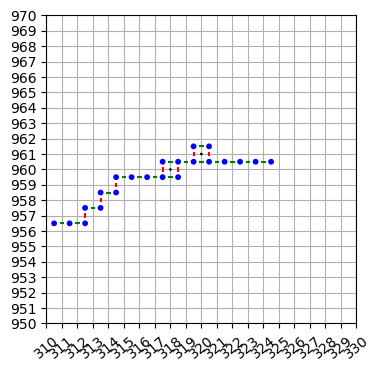

In [32]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

xmin, xmax = 310,330
ymin, ymax = 950,970

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(x,rotation=40)
ax.set_yticks(y)
ax.grid()

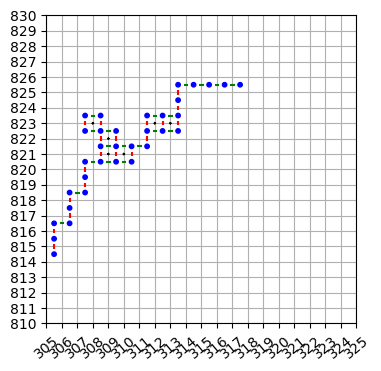

In [33]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

xmin, xmax =305,325
ymin, ymax =810,830

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(x,rotation=40)
ax.set_yticks(y)
ax.grid()

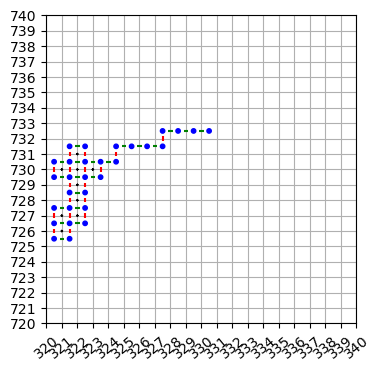

In [34]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

xmin, xmax =320,340
ymin, ymax =720,740

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(x,rotation=40)
ax.set_yticks(y)
ax.grid()

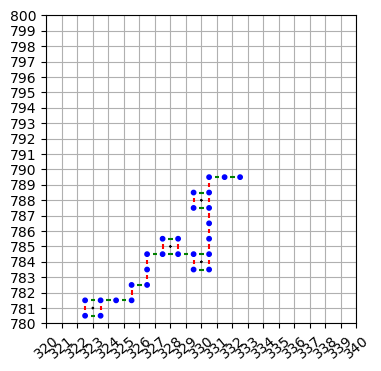

In [35]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

xmin, xmax =320,340
ymin, ymax =780,800

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(x,rotation=40)
ax.set_yticks(y)
ax.grid()

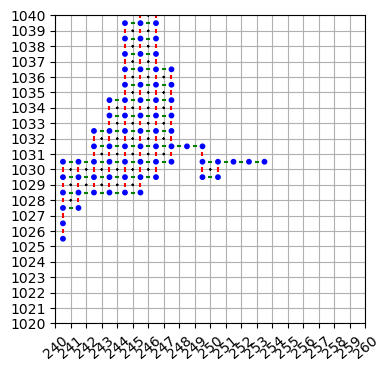

In [36]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

xmin, xmax =240,260
ymin, ymax =1020,1040

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xticks(x)
ax.set_xticklabels(x,rotation=40)
ax.set_yticks(y)
ax.grid()

## and add global attributes

In [37]:
globals = xr.open_dataset('/agdat1/parker/LO_roms/cas7_t0_x4b/f2018.01.02/ocean_his_0024.nc')

grid.attrs['hc'] = globals.hc.values
grid.attrs['s_w'] = globals.s_w.values
grid.attrs['Cs_w'] = globals.Cs_w.values

In [38]:
grid.to_netcdf('/data1/bbeutel/LO_output/grid/grid_cas7.nc')